# Machine Learning Fundamentals
### Hesus Garcia
### Lección 6 - Reducción de la dimensionalidad
## Reducción de la dimensionalidad con t-SNE
Se cargan los paquetes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

Se leen los datos

In [2]:
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', version=1, return_X_y = True)

Se hace el dataset mas corto para hacer el ejemplo mas rapido

In [3]:
n_samples = 5000
x=x[:n_samples, :]
y = np.array(y[:n_samples].ravel(), dtype=np.int)
print(x.shape, y.shape)

(5000, 784) (5000,)


Dibujar un ejemplo de manera aleatoria

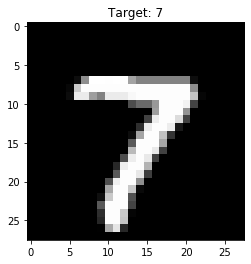

In [4]:
sample = np.random.randint(n_samples)
plt.imshow(x[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Target: %i'%y[sample])
plt.show()

In [5]:
model = TSNE(n_components = 2, n_iter = 2000, n_jobs = -1)

In [6]:
x_2d = model.fit_transform(x)
x_2d.shape

(5000, 2)

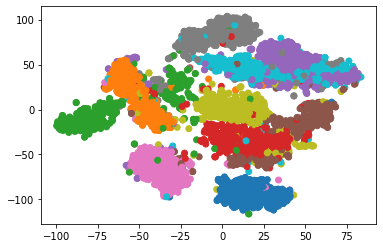

In [7]:
plt.scatter(x_2d[:,0], x_2d[:,1], c = y, cmap = plt.cm.tab10)

# Clasificación de digitos con PCA y SVM

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm, metrics

Separar los sets de entrenamiento y de pruebas

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)

Se crea una instancia del modelo

In [10]:
model = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 50)), ('SVM', svm.SVC(gamma=0.0001)) ])

Se entrena el modelo

In [11]:
model.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=50)),
                ('SVM', SVC(gamma=0.0001))])

Se aplica la metrica al modelo

In [12]:
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

Train:  0.8935555555555555
Test:  0.898


Se hacen predicciones del test

In [13]:
ypred = model.predict(xtest)

In [14]:
print('Classification report: \n', metrics.classification_report(ytest, ypred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        52
           1       0.84      0.98      0.91        59
           2       0.96      0.78      0.86        64
           3       0.92      0.84      0.88        43
           4       0.87      0.94      0.90        49
           5       0.95      0.96      0.95        54
           6       0.96      0.96      0.96        52
           7       0.83      0.80      0.82        50
           8       0.87      0.94      0.91        36
           9       0.78      0.88      0.83        41

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



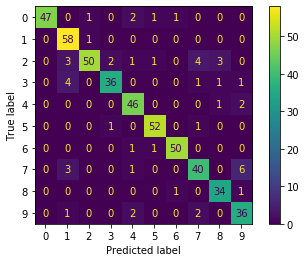

In [15]:
metrics.plot_confusion_matrix(model, xtest, ytest)

Se dibuja una prediccion aleatoria

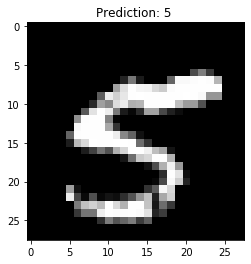

In [16]:
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap = plt.cm.gray)
plt.title('Prediction: %i ' % ypred[sample])
plt.show()

# Guardar modelo

In [40]:
from joblib import dump
dump(model, 'mnist_classifier.joblib')

['mnist_classifier.joblib']

In [42]:
from joblib import load
model2 = load('mnist_classifier.joblib')

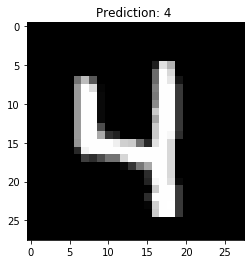

In [43]:
# Se dibuja una prediccion aleatoriamente
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap = plt.cm.gray)
ypred = model2.predict(xtest[sample].reshape(1,-1))
plt.title('Prediction: %i ' % ypred)
plt.show()



# Hacer el mismo ejemplo pero con el fashion mnist dataset

In [18]:
from sklearn.datasets import fetch_openml
x, y = fetch_openml('fashion-mnist', version='active', return_X_y = True)

In [20]:
x.shape, y.shapex

((70000, 784), (70000,))

In [21]:
x_backup = x.copy()
y_backup = y.copy()

Se hace mas corto el data set

In [22]:
n_samples = 10000
x=x[:n_samples, :]
y = np.array(y[:n_samples].ravel(), dtype=np.int)
print(x.shape, y.shape)

(10000, 784) (10000,)


Se dibuja un ejemplo de manera aleatoria

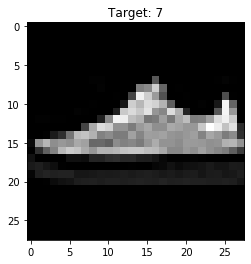

In [30]:
sample = np.random.randint(n_samples)
plt.imshow(x[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Target: %i'%y[sample])
plt.show()

In [31]:
model = TSNE(n_components = 2, n_iter = 2000, n_jobs = -1)

In [32]:
x_2d = model.fit_transform(x)
x_2d.shape

(10000, 2)

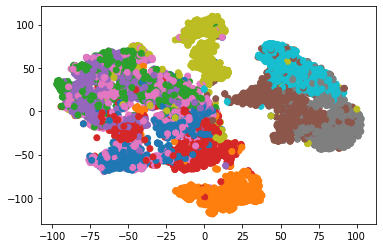

In [33]:
plt.scatter(x_2d[:,0], x_2d[:,1], c = y, cmap = plt.cm.tab10)

## Clasificacion de articulos de moda con PCA y SVM

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)

Se crea una instancia del modelo

In [35]:
model = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components = 50)), ('SVM', svm.SVC(gamma=0.0001)) ])

Se entrena el modelo

In [36]:
model.fit(xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=50)),
                ('SVM', SVC(gamma=0.0001))])

Se aplica la metrica al modelo

In [37]:
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

Train:  0.8024444444444444
Test:  0.791


Se hacen las predicciones del test

In [38]:
ypred = model.predict(xtest)

In [84]:
print('Classification report: \n',  metrics.classification_report(ytest, ypred))

Classification report: 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        86
           1       1.00      0.88      0.94       104
           2       0.67      0.58      0.62        99
           3       0.75      0.89      0.81       107
           4       0.66      0.78      0.72        97
           5       0.88      0.88      0.88       100
           6       0.53      0.43      0.48        99
           7       0.84      0.82      0.83        97
           8       0.93      0.90      0.91        99
           9       0.89      0.92      0.90       112

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.79      0.79      0.79      1000



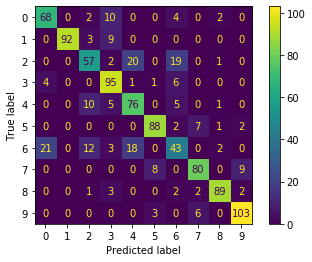

In [40]:
metrics.plot_confusion_matrix(model, xtest, ytest)

Se crea un diccionario para identificar la clase

In [53]:
fashion_classes = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 
                   5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

In [54]:
fashion_classes[0]

'T-shirt/top'

Se dibuja una prediccion aleatoria

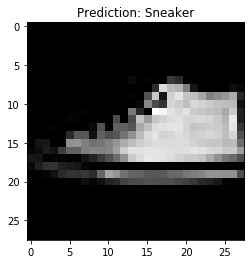

In [77]:
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap = plt.cm.gray)
#plt.title('Prediction: %i ' % ypred[sample])
plt.title('Prediction: ' + fashion_classes[ypred[sample]])
plt.show()

In [ ]:
7 zapato
6 camisa
4 camisa
5 tacones
3 playera


In [43]:
n_samples

10000

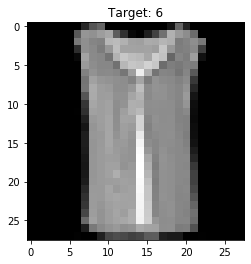

In [44]:
sample = np.random.randint(n_samples)
plt.imshow(x[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Target: %i'%y[sample])
plt.show()